<center> <h1>Living in Singapore</h1> </center>

## Introduction

Singapore's rising cost of living results from exorbitant housing prices. Singapore, being a small country, is densely populated. Moreover, as Singapore 
becomes more developed as one of the major trade hubs, this busy city is becoming a very highly skilled one. With greater purchasing power, the locals are 
looking towards a better lifestyle, striving for material items, with housing as one of the choices. The change in lifestyle, the lack of the availability of 
land and the relatively large population size push the houses prices up in Singapore. While married couples have to option to apply for Build-to-Order flats 
which are subsidized by the government, this option is sadly not available for singles, who can only purchase resale flats. Purchasing a cheap flat in 
Singapore is not an easy thing. In this project, we will look at possible options of housing area for single Singaporeans and compare the prices, ultimately making some 
recommendations.

## Data Description

The data we need are mainly the housing prices in Singapore, and the coordinates of the towns in Singapore.

* We obtained the data on prices of resale flats from https://data.gov.sg/.
        - Some assumptions made: The individuals will look for the cheapest option, which are 2 room flats (for practical purposes in terms of the size of the house as well).
        
* For the coordinates of the towns in Singapore, we obtained the dataset of the coordinates of train stations in Singapore from Kaggle. As the name of the train stations usually correspond to the towns the stations are in, we will regard this dataset to be suitable.

We will then compare the amenities around every town using Foursquare location data before we make a recommendation on the suitability of the housing area.

## Data Preparation

#### We import some Python libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### We upload the dataset with the coordinates.

In [2]:
# The code was removed by Watson Studio for sharing.

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523


#### We uppercase the 'station_name' column and rename the column name to coincide with the housing prices dataset later. We also drop the irrelevant column 'type'.

In [3]:
df_data_1['station_name'] = df_data_1['station_name'].str.upper()
df_1=df_data_1.drop('type',axis=1)
df_2=df_1.rename(columns={'station_name':'town'})

In [4]:
df_2.head()

,town,lat,lng
0,JURONG EAST,1.333207,103.742308
1,BUKIT BATOK,1.349069,103.749596
2,BUKIT GOMBAK,1.359043,103.751863
3,CHOA CHU KANG,1.385417,103.744316
4,YEW TEE,1.397383,103.747523


#### We upload the dataset with the housing prices.

In [5]:
# The code was removed by Watson Studio for sharing.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### We drop the irrelavent columns 'month','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease'.

In [6]:
df=df_data_2.drop(['month','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease'], axis=1)
df.head()

,town,flat_type,resale_price
0,ANG MO KIO,2 ROOM,232000.0
1,ANG MO KIO,3 ROOM,250000.0
2,ANG MO KIO,3 ROOM,262000.0
3,ANG MO KIO,3 ROOM,265000.0
4,ANG MO KIO,3 ROOM,265000.0


#### Following our assumption, we drop the rows where the 'flat_type'!='2 ROOM', and then drop the 'flat_type' column to make the dataset clean.

In [7]:
df1=df[df.flat_type=='2 ROOM']
df2=df1.groupby(['town','flat_type']).mean().reset_index()
df3=df2.drop('flat_type',axis=1)
df3.head()

,town,resale_price
0,ANG MO KIO,213859.154930
1,BEDOK,219469.014085
2,BOON LAY,220723.525424
3,BUKIT PANJANG,233255.307692
4,CHOA CHU KANG,230084.848485


#### We now perform a left join of the datasets based on the 'town' column.

In [8]:
combine=df3.merge(df_2,on='town',how='left')

In [44]:
combine.head()

,town,resale_price,lat,lng
0,ANG MO KIO,213859.154930,1.370025,103.849588
1,BEDOK,219469.014085,1.324043,103.930205
2,BOON LAY,220723.525424,1.338620,103.705817
3,BUKIT PANJANG,233255.307692,1.378340,103.762452
4,CHOA CHU KANG,230084.848485,1.385417,103.744316


In [10]:
print('The dataframe has {} towns.'.format(
        len(combine['town'].unique()),
        combine.shape[0]
    )
)

The dataframe has 23 towns.


#### Let us have a look at the Singapore map labelled with the towns.

In [11]:
address = 'Singapore, SG'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [12]:
# create map of Singapore using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, town in zip(combine['lat'], combine['lng'], combine['town']):
    label = '{}'.format(town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

#### We explore the first town listed in our dataframe.

In [13]:
# The code was removed by Watson Studio for sharing.

In [14]:
combine.loc[0, 'town']

'ANG MO KIO'

In [15]:
town_latitude = combine.loc[0, 'lat'] # town latitude value
town_longitude = combine.loc[0, 'lng'] # town longitude value

town_name = combine.loc[0, 'town'] # town name

print('Latitude and longitude values of {} are {}, {}.'.format(town_name, 
                                                               town_latitude, 
                                                               town_longitude))

Latitude and longitude values of ANG MO KIO are 1.370025, 103.849588.


In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    town_latitude, 
    town_longitude, 
    radius, 
    LIMIT)

In [17]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '602a2a4101bac51bb1a6e3d0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ang Mo Kio',
  'headerFullLocation': 'Ang Mo Kio, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 40,
  'suggestedBounds': {'ne': {'lat': 1.3745250045000046,
    'lng': 103.85408088683592},
   'sw': {'lat': 1.3655249954999955, 'lng': 103.84509511316408}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bc30123abf495215220c393',
       'name': 'Old Chang Kee',
       'location': {'address': 'AMK Hub',
        'crossStreet': '53 Ang Mo Kio Avenue 3',
        'lat': 1.369093882325005,
        'lng': 103.84838865753792,
        'labeledLatLngs':

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Old Chang Kee,Snack Place,1.369094,103.848389
1,FairPrice Xtra,Supermarket,1.369279,103.848886
2,MOS Burger,Burger Joint,1.369170,103.847831
3,A&W,Fast Food Restaurant,1.369541,103.849043
4,Face Ban Mian 非板面 (Ang Mo Kio),Noodle House,1.372031,103.847504


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

40 venues were returned by Foursquare.


#### We now consider the other towns together as well.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Town', 
                  'Town Lat', 
                  'Town Lat', 
                  'Venue', 
                  'Venue Lat', 
                  'Venue Lng', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
combine_venues = getNearbyVenues(names=combine['town'],
                                   latitudes=combine['lat'],
                                   longitudes=combine['lng']
                                  )

ANG MO KIO
BEDOK
BOON LAY
BUKIT PANJANG
CHOA CHU KANG
CLARKE QUAY
CLEMENTI
DAKOTA
GEYLANG BAHRU
HOUGANG
JURONG EAST
KALLANG
PASIR RIS
PUNGGOL
QUEENSTOWN
REDHILL
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


In [23]:
print(combine_venues.shape)
combine_venues.head()

(985, 7)


,Town,Town Lat,Town Lat,Venue,Venue Lat,Venue Lng,Venue Category
0,ANG MO KIO,1.370025,103.849588,Old Chang Kee,1.369094,103.848389,Snack Place
1,ANG MO KIO,1.370025,103.849588,FairPrice Xtra,1.369279,103.848886,Supermarket
2,ANG MO KIO,1.370025,103.849588,MOS Burger,1.369170,103.847831,Burger Joint
3,ANG MO KIO,1.370025,103.849588,A&W,1.369541,103.849043,Fast Food Restaurant
4,ANG MO KIO,1.370025,103.849588,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House


In [24]:
combine_venues.groupby('Town').count()

,Town Lat,Town Lat,Venue,Venue Lat,Venue Lng,Venue Category
Town,,,,,,
ANG MO KIO,40,40,40,40,40,40
BEDOK,58,58,58,58,58,58
BOON LAY,74,74,74,74,74,74
BUKIT PANJANG,48,48,48,48,48,48
CHOA CHU KANG,20,20,20,20,20,20
CLARKE QUAY,100,100,100,100,100,100
CLEMENTI,63,63,63,63,63,63
DAKOTA,32,32,32,32,32,32
GEYLANG BAHRU,8,8,8,8,8,8


In [25]:
print('There are {} uniques categories.'.format(len(combine_venues['Venue Category'].unique())))

There are 172 uniques categories.


In [26]:
# one hot encoding
combine_onehot = pd.get_dummies(combine_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
combine_onehot['Town'] = combine_venues['Town'] 

# move neighborhood column to the first column
fixed_columns = [combine_onehot.columns[-1]] + list(combine_onehot.columns[:-1])
combine_onehot = combine_onehot[fixed_columns]

combine_onehot.head()

,Town,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Canal,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Light Rail Station,Lighthouse,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Music Venue,Night Market,Nightclub,Noodle House,Outlet Store,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taxi,Taxi Stand,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Yoga Studio
0,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ANG MO KIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [27]:
combine_onehot.shape

(985, 173)

In [28]:
combine_grouped = combine_onehot.groupby('Town').mean().reset_index()
combine_grouped

,Town,ATM,Accessories Store,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Canal,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chinese Breakfast Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Concert Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,General Entertainment,German Restaurant,Gift Shop,Grocery Store,Gym,Gym / Fitness Center,Hainan Restaurant,Halal Restaurant,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Light Rail Station,Lighthouse,Lounge,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Music Venue,Night Market,Nightclub,Noodle House,Outlet Store,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Post Office,Pub,Ramen Restaurant,Recreation Center,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taxi,Taxi Stand,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Yoga Studio
0,ANG MO KIO,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.025000,0.000000,0.000000,0.025000,0.025,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.025000,0.00,0.00,0.050000,0.000000,0.025000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.025000,0.000000,0.00,0.100000,0.000000,0.00,0.025000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.075000,0.00,0.00,0.025000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.025000,0.025000,0.000000,0.000000,0.000000,0.000000,0.00,0.025,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.025,0.000000,0.025,0.000000,0.000000,0.025000,0.00,0.000000,0.00,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.025000,0.000000,0.000000,0.00,0.000000,0.00,0.00000,0.025000,0.000,0.000000,0.025000,0.000000,0.025000,0.00,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.050000,0.025000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00
1,BEDOK,0.000000,0.000000,0.017241,0.000000,0.00,0.000000,0.034483,0.000000,0.000000,0.017241,0.000,0.000000,0.000000,0.00000,0.00000,0.000000,0.0

In [29]:
combine_grouped.shape

(23, 173)

In [30]:
num_top_venues = 4

for hood in combine_grouped['Town']:
    print("----"+hood+"----")
    temp = combine_grouped[combine_grouped['Town'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ANG MO KIO----
          venue  freq
0   Coffee Shop  0.10
1    Food Court  0.08
2  Dessert Shop  0.08
3   Snack Place  0.05


----BEDOK----
                 venue  freq
0          Coffee Shop  0.07
1  Japanese Restaurant  0.05
2           Food Court  0.05
3     Sushi Restaurant  0.05


----BOON LAY----
                  venue  freq
0   Japanese Restaurant  0.11
1      Asian Restaurant  0.09
2  Fast Food Restaurant  0.08
3          Dessert Shop  0.05


----BUKIT PANJANG----
                  venue  freq
0  Fast Food Restaurant  0.08
1      Asian Restaurant  0.08
2      Sushi Restaurant  0.06
3           Coffee Shop  0.06


----CHOA CHU KANG----
                  venue  freq
0  Fast Food Restaurant  0.15
1           Coffee Shop  0.15
2            Food Court  0.10
3                  Park  0.05


----CLARKE QUAY----
        venue  freq
0         Bar  0.07
1   Nightclub  0.05
2       Hotel  0.04
3  Food Court  0.03


----CLEMENTI----
              venue  freq
0       Coffee Shop  0.10


In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Town']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Town'] = combine_grouped['Town']

for ind in np.arange(combine_grouped.shape[0]):
    town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(combine_grouped.iloc[ind, :], num_top_venues)

town_venues_sorted.head()

,Town,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,Coffee Shop,Dessert Shop,Food Court,Japanese Restaurant,Bubble Tea Shop,Supermarket,Snack Place,Asian Restaurant,Fried Chicken Joint,Noodle House
1,BEDOK,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Sandwich Place,Food Court,Chinese Restaurant,Dessert Shop,Noodle House,Fast Food Restaurant,Supermarket
2,BOON LAY,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Chinese Restaurant,Coffee Shop,Indian Restaurant,Café,Gym / Fitness Center,Karaoke Bar
3,BUKIT PANJANG,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Sushi Restaurant,Shopping Mall,Korean Restaurant,Supermarket,Indonesian Restaurant,Bus Station,Café
4,CHOA CHU KANG,Fast Food Restaurant,Coffee Shop,Food Court,Bakery,Café,Bookstore,Supermarket,Sandwich Place,Food Truck,Thai Restaurant


## Methodology

We will perform K-means clustering on the towns. To determine how many clusters to use, we use the Silhouette method.

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [34]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [35]:
maxk = 15
scores = []
kval = []

for k in range(2, maxk+1):
    cl_df = combine.drop(['town', 'resale_price'], axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

[0.4330719451084509, 0.43260649481945773, 0.45121792602175864, 0.44948856792886793, 0.4338394155409952, 0.44110510872600606, 0.4497927174564595, 0.44060003469769266, 0.4303614692712566, 0.39893350246724635, 0.390414463635428, 0.3586849796517097, 0.3455593411324772, 0.3138298571487589]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


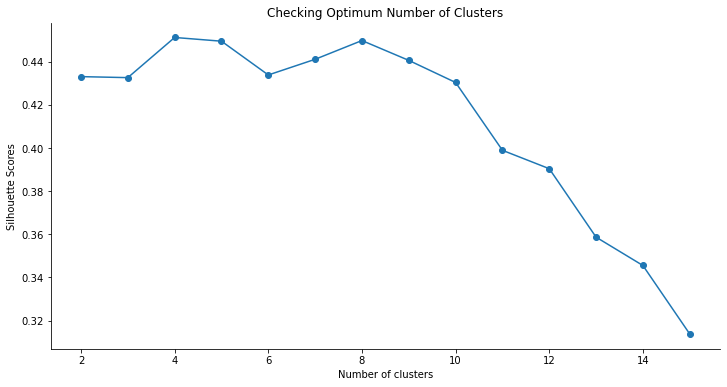

In [36]:
print(scores)
print(kval)
plot(kval, scores)

#### We see from the above graph that the optimum number of clusters is 4, having the highest Silhouette score.

In [37]:
# set number of clusters
kclusters = 4

combine_grouped_clustering = combine_grouped.drop('Town', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combine_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 0, 1, 2, 1, 0, 2], dtype=int32)

In [38]:
# add clustering labels
town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

combine_merged = combine

combine_merged = combine_merged.join(town_venues_sorted.set_index('Town'), on='town')

combine_merged.head()

,town,resale_price,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,213859.154930,1.370025,103.849588,2,Coffee Shop,Dessert Shop,Food Court,Japanese Restaurant,Bubble Tea Shop,Supermarket,Snack Place,Asian Restaurant,Fried Chicken Joint,Noodle House
1,BEDOK,219469.014085,1.324043,103.930205,2,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Sandwich Place,Food Court,Chinese Restaurant,Dessert Shop,Noodle House,Fast Food Restaurant,Supermarket
2,BOON LAY,220723.525424,1.338620,103.705817,2,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Chinese Restaurant,Coffee Shop,Indian Restaurant,Café,Gym / Fitness Center,Karaoke Bar
3,BUKIT PANJANG,233255.307692,1.378340,103.762452,2,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Sushi Restaurant,Shopping Mall,Korean Restaurant,Supermarket,Indonesian Restaurant,Bus Station,Café
4,CHOA CHU KANG,230084.848485,1.385417,103.744316,0,Fast Food Restaurant,Coffee Shop,Food Court,Bakery,Café,Bookstore,Supermarket,Sandwich Place,Food Truck,Thai Restaurant


In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(combine_merged['lat'], combine_merged['lng'], combine_merged['town'], combine_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [40]:
combine_merged.loc[combine_merged['Cluster Labels'] == 0, combine_merged.columns[[1] + list(range(5, combine_merged.shape[1]))]]


,resale_price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,230084.848485,Fast Food Restaurant,Coffee Shop,Food Court,Bakery,Café,Bookstore,Supermarket,Sandwich Place,Food Truck,Thai Restaurant
8,201506.097561,Coffee Shop,Indian Restaurant,Café,Food Court,Supermarket,Noodle House,Park,Dog Run,Donut Shop,Dumpling Restaurant


In [41]:
combine_merged.loc[combine_merged['Cluster Labels'] == 1, combine_merged.columns[[1] + list(range(5, combine_merged.shape[1]))]]


,resale_price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,243653.846154,Bar,Nightclub,Hotel,Japanese Restaurant,Food Court,Noodle House,Café,Mexican Restaurant,Lounge,Italian Restaurant
7,216000.000000,Noodle House,Dessert Shop,Asian Restaurant,Chinese Restaurant,Seafood Restaurant,Snack Place,BBQ Joint,Coffee Shop,Food Court,Dim Sum Restaurant
11,225843.478261,Hostel,Food Court,Snack Place,BBQ Joint,Thai Restaurant,Historic Site,Noodle House,Chinese Restaurant,Rock Club,Seafood Restaurant
14,250556.338028,Food Court,Chinese Restaurant,Café,Noodle House,Indian Restaurant,Seafood Restaurant,Thai Restaurant,Stadium,Italian Restaurant,Train Station


In [42]:
combine_merged.loc[combine_merged['Cluster Labels'] == 2, combine_merged.columns[[1] + list(range(5, combine_merged.shape[1]))]]


,resale_price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,213859.154930,Coffee Shop,Dessert Shop,Food Court,Japanese Restaurant,Bubble Tea Shop,Supermarket,Snack Place,Asian Restaurant,Fried Chicken Joint,Noodle House
1,219469.014085,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Sandwich Place,Food Court,Chinese Restaurant,Dessert Shop,Noodle House,Fast Food Restaurant,Supermarket
2,220723.525424,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Dessert Shop,Chinese Restaurant,Coffee Shop,Indian Restaurant,Café,Gym / Fitness Center,Karaoke Bar
3,233255.307692,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Sushi Restaurant,Shopping Mall,Korean Restaurant,Supermarket,Indonesian Restaurant,Bus Station,Café
6,302217.391304,Coffee Shop,Food Court,Chinese Restaurant,Dessert Shop,Asian Restaurant,Chinese Breakfast Place,Fried Chicken Joint,Shopping Mall,Bus Station,Fast Food Restaurant
9,235102.857143,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Food Court,Supermarket,Café,Frozen Yogurt Shop,Shopping Mall,Soup Place,Pharmacy
10,240772.704545,Café,Coffee Shop,Chinese Restaurant,Japanese Restaurant,Food Court,Shopping Mall,Pharmacy,Clothing Store,Bubble Tea Shop,Multiplex
12,263368.421053,Food Court,Diner,Sandwich Place,Fast Food Restaurant,Italian Restaurant,Coffee Shop,Pool,Recreation Center,Restaurant,Fruit & Vegetable Store
13,253139.742857,Japanese Restaurant,Bubble Tea Shop,Chinese Restaurant,Café,Bakery,Fast Food Restaurant,Supermarket,Sushi Restaurant,ATM,Light Rail Station
16,224294.800000,Coffee Shop,Asian Restaurant,Fast Food Restaurant,Chinese Restaurant,Shopping Mall,Bus Station,Sporting Goods Shop,Food,Supermarket,Bistro


In [43]:
combine_merged.loc[combine_merged['Cluster Labels'] == 3, combine_merged.columns[[1] + list(range(5, combine_merged.shape[1]))]]


,resale_price,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,249547.293103,Chinese Restaurant,Asian Restaurant,Coffee Shop,Supermarket,Malay Restaurant,Gym,Hainan Restaurant,Park,Food Court,Train Station
20,204460.367816,Chinese Restaurant,Coffee Shop,Snack Place,Dessert Shop,Cosmetics Shop,Grocery Store,Monument / Landmark,Café,Frozen Yogurt Shop,Bubble Tea Shop


## Results and Discussion

From the 4 clusters, we observe that cluster 2 consists of flats of relatively higher prices compared to the other clusters. Venue wise, all the clusters are populated with a variety of food options. Some venues like parks are only found in cluster 0 and cluster 3. Cluster 1 does not have any groceries or supermarkets while Cluster 0 does not have any train stations. Thus cluster 3 seems to be a suitable option for living, with transport, amenities like gym, park etc. while having lower prices. If flexibility in prices is allowed, cluster 2 is the better choice, with a better variety in venues. Based on our assumptions that the individual is looking for the cheapest options, cluster 3 is the better choice, with the basic amenities like transport, park, and supermarket.

## Conclusion

We have analyzed the towns in Singapore to determine the optimal location for singles in Singapore to live in. This project can be further improved by considering other factors like the different types of flats (which we made an assumption), ethnic quota etc. Thank you for reading up to this point.